<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1> Hackwagon Academy DS102 Lesson 6B </h1>
<h2> Decision Tree </h2> 
<h3> Lesson Outline </h3>

- [Decision Tree Example - Iris Dataset](#1)
- [Model Evaluation Example - Diabetes Dataset](#2)

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;</font><font color="salmon"> Decision Tree Example - Iris Dataset </font> </h2></a>

### Read Dataset

In [18]:
import pandas as  pd
iris_df = pd.read_csv('iris-data.csv')
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


The target name contains the names of 3 different types of flowers. 
![Iris Flowers](https://i.imgur.com/HTPPAoN.png)


### Select Features

In [19]:
# extract two columns
features = ['petal length (cm)', 'petal width (cm)']

df_x = iris_df[features]
df_y = iris_df['target name']

df_x.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [21]:
print( set(df_y) )

{'setosa', 'versicolor', 'virginica'}


### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.20, # 20% Testing Data
                                                    random_state=10)

x_train.head()
#y_train.head()


,petal length (cm),petal width (cm)
58,4.6,1.3
97,4.3,1.3
129,5.8,1.6
114,5.1,2.4
146,5.0,1.9


**Note**:  Setting the Seed for random_state makes the process reproducible the next time you run the experiment again.  However, do note that it is not repeatable across different computers.

### Grow Tree

Create a decision tree by using the `DecisionTreeClassifier` where your criterion is `entropy`.

In [22]:
from sklearn.tree import DecisionTreeClassifier

iris_dtree = DecisionTreeClassifier(criterion= "entropy")
iris_dtree.fit(x_train, y_train)

# depth of tree is the number of questions to ask
print("Depth of tree", iris_dtree.tree_.max_depth)

Depth of tree 7


[Text(248.0, 407.7, 'X[1] <= 0.8\nentropy = 1.582\nsamples = 120\nvalue = [40, 37, 43]\nclass = virginica'),
 Text(186.0, 353.34000000000003, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(310.0, 353.34000000000003, 'X[0] <= 4.75\nentropy = 0.996\nsamples = 80\nvalue = [0, 37, 43]\nclass = virginica'),
 Text(186.0, 298.98, 'X[1] <= 1.65\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]\nclass = versicolor'),
 Text(124.0, 244.62, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = versicolor'),
 Text(248.0, 244.62, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(434.0, 298.98, 'X[0] <= 5.15\nentropy = 0.426\nsamples = 46\nvalue = [0, 4, 42]\nclass = virginica'),
 Text(372.0, 244.62, 'X[1] <= 1.85\nentropy = 0.787\nsamples = 17\nvalue = [0, 4, 13]\nclass = virginica'),
 Text(310.0, 190.26, 'X[1] <= 1.75\nentropy = 0.971\nsamples = 10\nvalue = [0, 4, 6]\nclass = virginica'),
 Text(186.0, 135.89999999999998, 'X[1] <= 1.55\nentrop

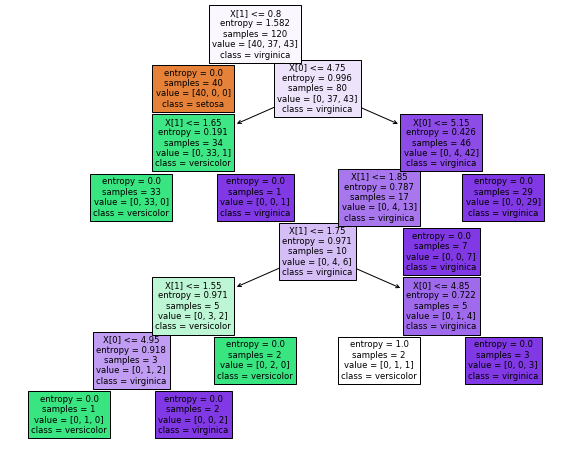

In [29]:
from sklearn import tree
from matplotlib.pyplot import figure

# visualise how the tree looks like
figure(figsize=(10,8))
tree.plot_tree(iris_dtree, filled=True, impurity=True, class_names = iris_dtree.classes_)

# tree depth starts at 0 at the root
# X[0] is petal length
# X[1] is petal width
# Y = {'virginica', 'setosa', 'versicolor'}

### Predict

After growing the decision tree, you can use it to predict further Iris spieces by using `.predict()`.

Note: `.predict()` only takes a DataFrame, or 2-D data structures. 

In [24]:
custom_iris = [
    # Petal Width , Petal Length
    [1.5, 2.5]
]
custom_df = pd.DataFrame(custom_iris)

display(custom_df)

iris_dtree.predict(custom_df)


,0,1
0,1.5,2.5


array(['virginica'], dtype=object)

### Feature Importance 

[0.34145703 0.65854297]


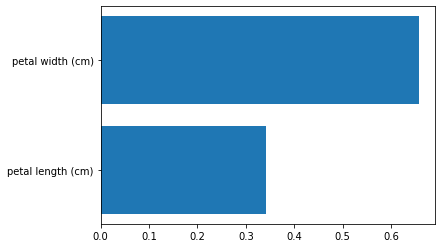

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.barh(features, iris_dtree.feature_importances_)
print(iris_dtree.feature_importances_)

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;</font><font color="salmon"> Model Evaluation Example - Diabetes Dataset </font> </h2></a>

Model evaluation is important in assessing whether your model is accurate, and if it requires adjusting/tuning to get better results. 

Here we will compare two different decision trees: 

1. Full Grown Tree
2. Pruned Trees

We will use the different metrics to compare their performance, through a confusion matrix. 

In [34]:
diabetes_df = pd.read_csv("diabetes-500.csv")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,141,84,26,0,32.4,0.433,22,0
1,4,83,86,19,0,29.3,0.317,34,0
2,1,128,82,17,183,27.5,0.115,22,0
3,9,112,82,32,175,34.2,0.260,36,1
4,2,71,70,27,0,28.0,0.586,22,0


### Feature Selection 

In this dataset, the outcome variable is 1, has diabetes; 0, has no diabetes. The rest of the columns will be the features for training this tree.

In [37]:
features = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

df_x = diabetes_df[features]
df_y = diabetes_df['Outcome']
#
display(df_x.head())
display(df_y.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0,141,84,26,32.4,0.433,22
1,4,83,86,19,29.3,0.317,34
2,1,128,82,17,27.5,0.115,22
3,9,112,82,32,34.2,0.260,36
4,2,71,70,27,28.0,0.586,22


0    0
1    0
2    0
3    1
4    0
Name: Outcome, dtype: int64

### Train Test Split

![Simple Train and Test](https://i.imgur.com/qOLmXIt.png)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(df_x,  df_y, test_size=0.2, random_state=5)




Note:  Again, setting the random_state with a seed makes your notebook reproducible next time you run it.

### Full Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

full_dis_tree = DecisionTreeClassifier(criterion="entropy")

full_dis_tree.fit(x_train,y_train)
print(full_dis_tree.tree_.max_depth)

18


### Pruned Tree

In [43]:
pruned_dis_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

pruned_dis_tree.fit(x_train,y_train)
print(full_dis_tree.tree_.max_depth)



18


### Testing Each Tree

After each tree is trained, test them against the test data by using `.predict()` on both trees.

In [48]:
full_results = pruned_dis_tree.predict(x_test)
print("Full tree predictions:")
print(full_results)

print("-----")

pruned_results = pruned_dis_tree.predict(x_test)
print("Pruned tree predictions:")
print(pruned_results)

Full tree predictions:
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1]
-----
Pruned tree predictions:
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1]


### (Pause and Think):  Would the full tree or pruned tree perform better?  Why?

In [36]:
#What you you think?




### Create Confusion Matrix 

Create the two confusion matrices using the `sklearn.metrics.confusion_matrix` with testing data.
Use `sklearn.metrics.print_confusion_matri` to visualize the confusion matrices.



In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_f = confusion_matrix(y_test, full_results)
cm_p = confusion_matrix(y_test, pruned_results)

print(cm_f) 
print(cm_p)

[[64  1]
 [21 14]]
[[64  1]
 [21 14]]


Confusion matrix (Full tree)
[[48 17]
 [13 22]]
Confusion matrix (Pruned Tree)
[[64  1]
 [21 14]]


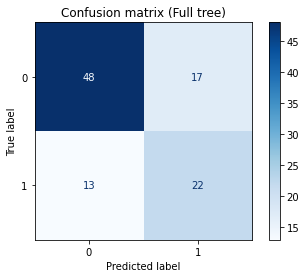

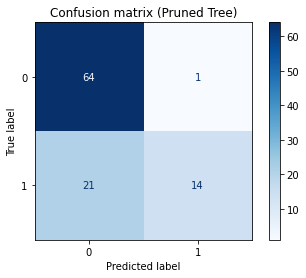

In [50]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix (Full tree)", full_dis_tree),
                  ("Confusion matrix (Pruned Tree)", pruned_dis_tree)]

for title, classifier in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

# actual is y-axis, predicted is x-axis


#### Questions

* What is the True Positive Rate (TPR)?
* What is the True Negative Rate (TNR)?
* What is the False Positive Rate?
* What is the False Negative Rate?


In [2]:
# Prefer full tree because the false negative is lower compared to pruned tree

#
#
#

#### Question to Ponder:

In detecting Diabetes, which are important?


In [1]:
#
#

### Accuracy Scores

You can compare the two trees by using `.accuracy()`, the same way you create the confusion matrix.

In [55]:
print("Full tree accuracy", full_dis_tree.score(x_test, y_test))
print("Pruned tree accuracy", pruned_dis_tree.score(x_test, y_test))

Full tree accuracy 0.7
Pruned tree accuracy 0.78


### Feature Importance

<BarContainer object of 7 artists>

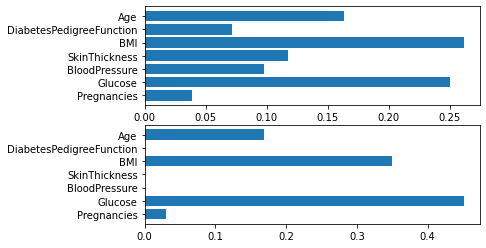

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2)

ax[0].barh(features, full_dis_tree.feature_importances_)

ax[1].barh(features, pruned_dis_tree.feature_importances_)

### <center> -- End -- </center>